## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [68]:
%pylab inline
data_dir = "../../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [69]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0   344k      0  0:03:51  0:03:51 --:--:--  429k


### Get the statistics from the Pickle File

In [70]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'STAT.pickle','r'))

In [71]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [72]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [73]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


In [74]:
# print STAT['TMIN']['eigvec'][0]
# print STAT['TMIN']['eigval']

# import heapq
# heapq.nlargest(6, xrange(len(STAT['TMIN']['eigval'])), STAT['TMIN']['eigval'].__getitem__)
# heapq.nlargest(10, range(len(STAT['TMIN']['eigval'])), STAT['TMIN']['eigval'].take)
# print STAT['TMIN']['eigval'][364]

# idx = (-STAT['TMIN']['eigval']).argsort()[:66]
# print idx

### Script for plotting yearly plots 

In [75]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

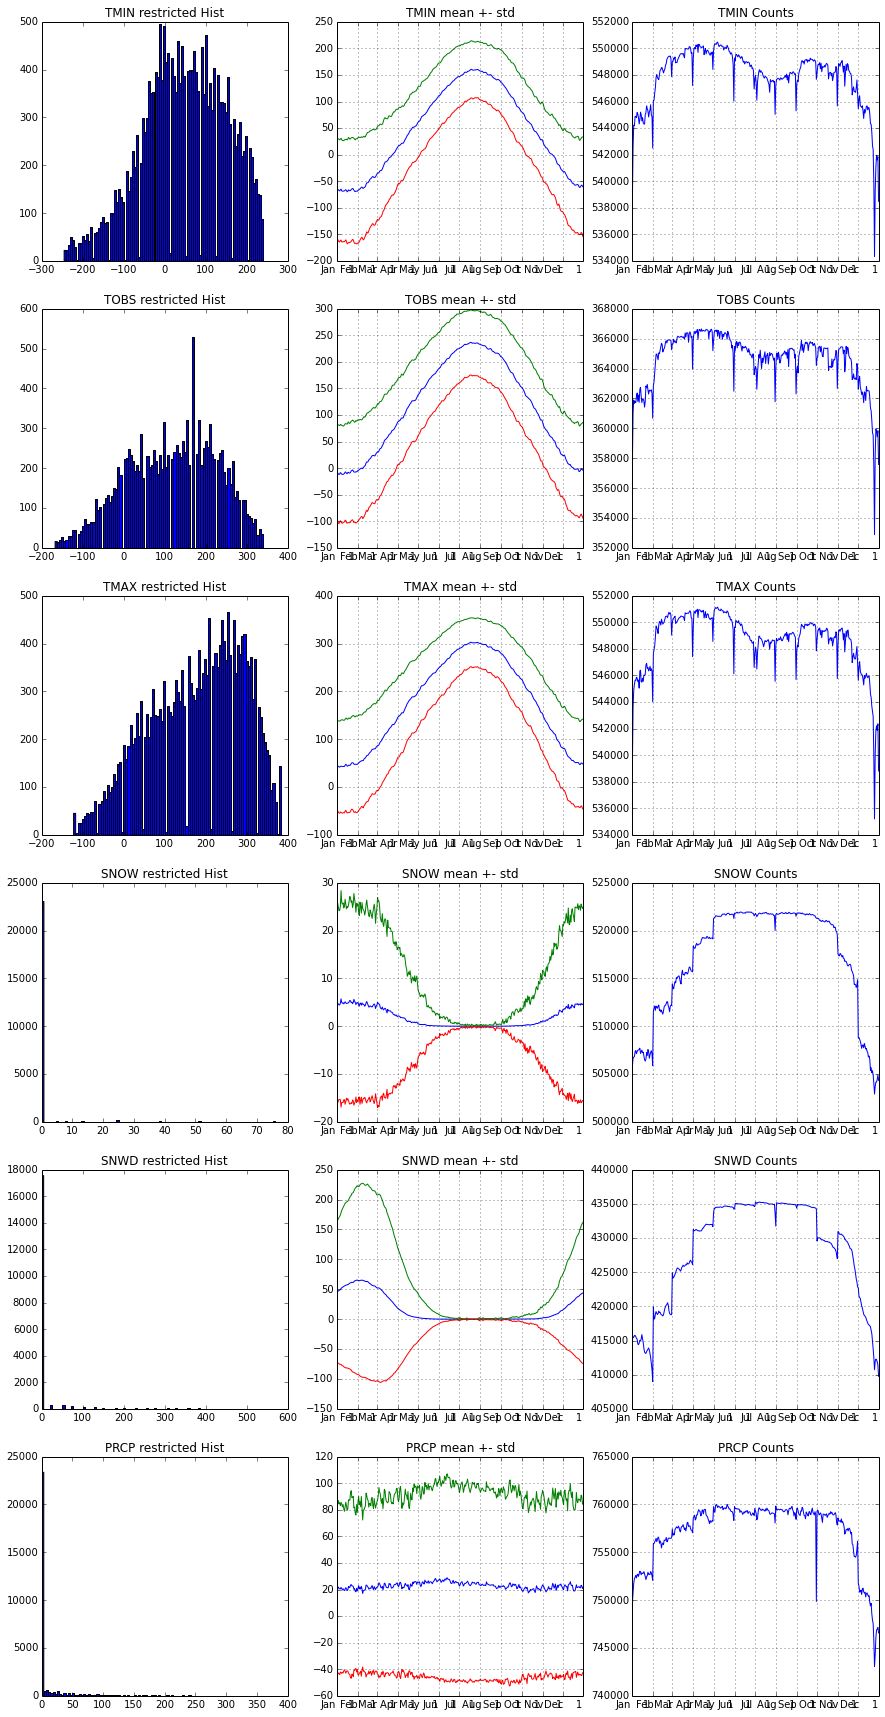

In [137]:
import matplotlib.pyplot as plt
import math 
figure(figsize=(15,30))
offset=1
array1 = []
# print STAT[meas]['NE']
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    Vals=STAT[meas]['SortedVals'];
    array1=[]
    for i in range(0,len(Vals)):
        if (Vals[i]>=STAT[meas]['low100'] and Vals[i]<=STAT[meas]['high100']):
            array1.append(Vals[i])
        
    plt.hist(array1,bins=100,edgecolor='black')
    title(meas + ' restricted Hist')
    ## Your code for Histogram
    subplot(6,3,offset)
    offset+=1
    stdplus=[0]*365
    stdminus=[0]*365
    for i in xrange (len(STAT[meas]['Mean'])):
        stdplus[i] = STAT[meas]['Mean'][i] + math.sqrt(STAT[meas]['Var'][i])
        stdminus[i] = STAT[meas]['Mean'][i] - math.sqrt(STAT[meas]['Var'][i])
    
    
    YearlyPlots(STAT[meas]['Mean'])
    YearlyPlots(stdplus)
    YearlyPlots(stdminus)
    title(meas + ' mean +- std')
    #plt.hist(STAT[meas]['mean'])
    ## Your code for mean and mean +- std
    subplot(6,3,offset)
    offset+=1
    YearlyPlots(STAT[meas]['NE'])
    title(meas + ' Counts')
    ## Your code for number of measurements

### Plot the Number of measurements recorded each day for TMAX

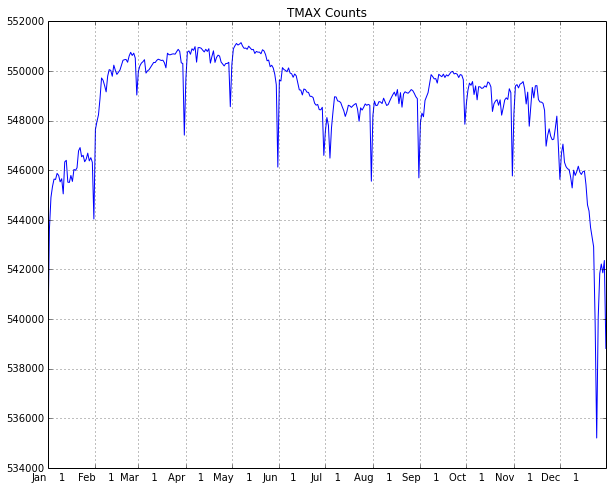

In [83]:
figure(figsize=(10,8))
YearlyPlots(STAT['TMAX']['NE'],'TMAX Counts')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


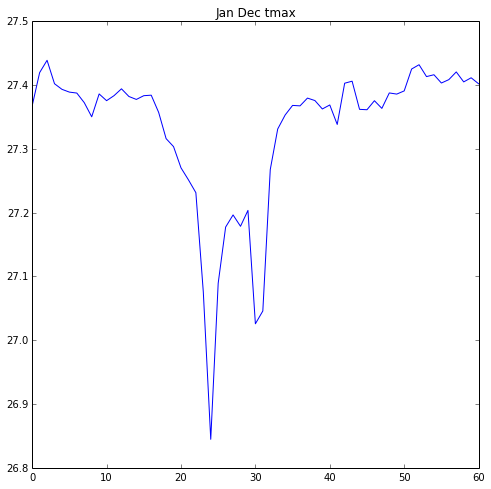

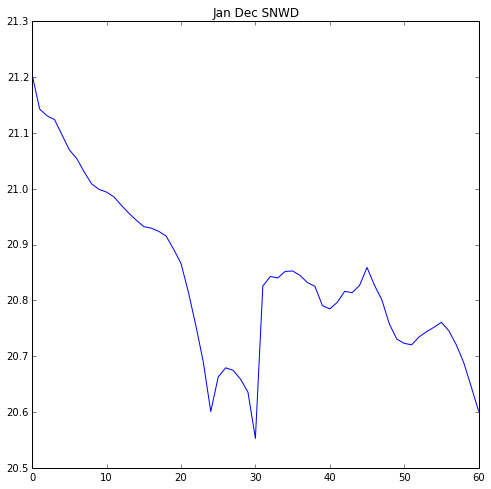

In [131]:
import pickle
Extra=pickle.load(open(data_dir+'tmax_all_stations.pickle','r'))
Drop_Jan_Dec_TMAX = STAT['TMAX']['NE'][-31:].tolist()+STAT['TMAX']['NE'][:30].tolist()
Stations = len(Extra)
count_extra = numpy.array(Drop_Jan_Dec_TMAX)/Stations
figure(figsize=(8,8))
plot(count_extra,'-')
title('Jan Dec tmax')
figure(figsize=(8,8))
Drop_Jan_Dec_SNWD = STAT['SNWD']['NE'][-31:].tolist()+STAT['SNWD']['NE'][:30].tolist()
count_extra = numpy.array(Drop_Jan_Dec_SNWD)/Stations
plot(count_extra,'-')
title('Jan Dec SNWD')


In [132]:
print 'average of tmax for dec jan is' 
print reduce(lambda x, y: x + y, Drop_Jan_Dec_TMAX) / (len(Extra)*len(Drop_Jan_Dec_TMAX))
Drop_Jan_Dec_TMAX = STAT['TMAX']['NE'][-7:].tolist()+STAT['TMAX']['NE'][:10].tolist()
print 'average of tmax for 24 dec 10jan is' 
print reduce(lambda x, y: x + y, Drop_Jan_Dec_TMAX) / (len(Extra)*len(Drop_Jan_Dec_TMAX))
Drop_Jan_Dec_TMAX = STAT['TMAX']['NE'][:].tolist()
print 'Overall of tmax for year is' 
print reduce(lambda x, y: x + y, Drop_Jan_Dec_TMAX) / (len(Extra)*len(Drop_Jan_Dec_TMAX))

average of tmax for dec jan is
27.3319226054
average of tmax for 24 dec 10jan is
27.2316060296
Overall of tmax for year is
27.5204792356


In [135]:
'''
### Extra Credit
###From the two graphs above which depicts the count from december 1 to 30 Jan.
In the first graph of TMAX, we can notice that sudden drop is during christmas and new year, which is holiday season.
The Overall for whole of the year is 27.5 for TMAX, where as average for december to january is 27.33. Where as for 
24 december to 10 jan the average again drops. So basically the count is dropping at holiday season only.

To remove it, it looks as if all stations are contributing equally in the lower count, so taking any outliers would be 
really impossible. Since we even noticed a drop at end of month, we can assume that these stations are not manned at end 
of month and on holidays, so maybe opening these stations would remove these outliers

################################################################################################################

For SNWD

The count for SNWD is decreasing gradually with increase in temperature. We can also see from the original graph that 
in summer more data is recorded as compared to winters. So maybe the temperature is effecting the radars and they are 
not able to note data properly. There is no way to remove these outliers. Analysis indicate temperature as the main 
reason. 

###
'''
print

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

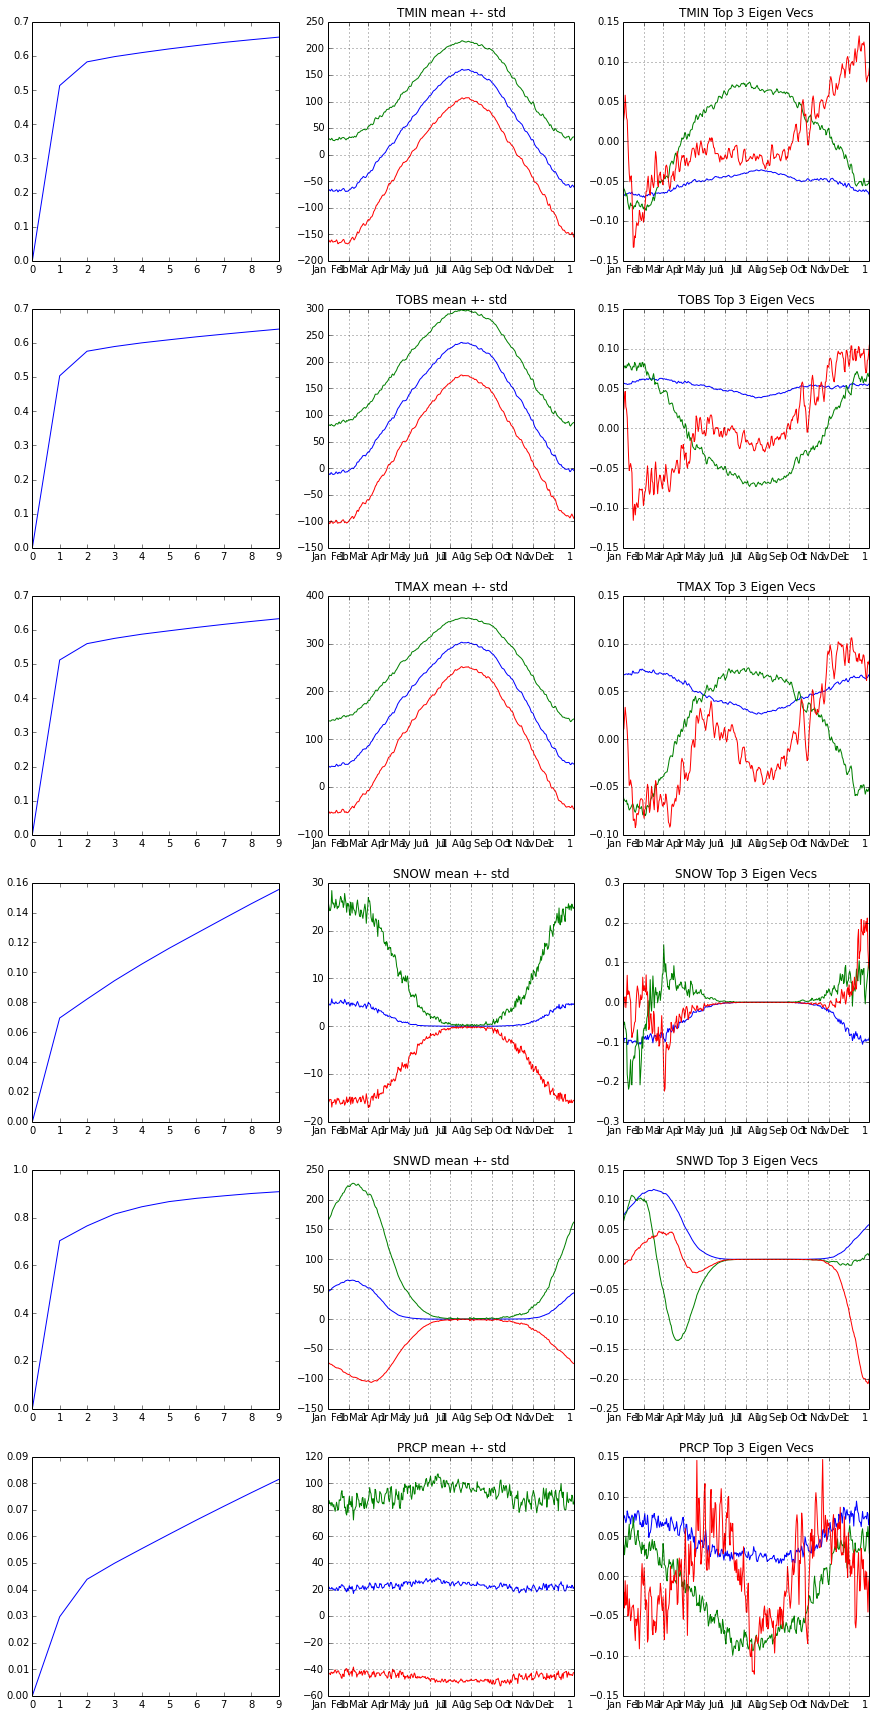

In [80]:
# print STAT_description
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    total=0
    array1=[0.0]*10
    array1[1]=STAT[meas]['eigval'][0]
    total=sum(STAT[meas]['eigval'])
    for i in range(2,10):
        array1[i]=array1[i-1]+STAT[meas]['eigval'][i-1]
    for i in range(1,10):
        array1[i]=array1[i]*1.0/total
#     print array1
    plt.plot(array1)
    ## Your code for percentage of variance explained
    subplot(6,3,offset)
    offset+=1
    for i in xrange (len(STAT[meas]['Mean'])):
        stdplus[i] = STAT[meas]['Mean'][i] + math.sqrt(STAT[meas]['Var'][i])
        stdminus[i] = STAT[meas]['Mean'][i] - math.sqrt(STAT[meas]['Var'][i])
    YearlyPlots(STAT[meas]['Mean'])
    YearlyPlots(stdplus)
    YearlyPlots(stdminus)
    title(meas + ' mean +- std')
    ## Your code for mean and mean +- std
    subplot(6,3,offset)
    offset+=1
    YearlyPlots(STAT[meas]['eigvec'][:,0])
    YearlyPlots(STAT[meas]['eigvec'][:,1])
    YearlyPlots(STAT[meas]['eigvec'][:,2])
    title(meas + ' Top 3 Eigen Vecs')
    ## Your code for top-3 eigenvectors